In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\amith\Downloads\Customer_Data.csv")

In [10]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (30, 4)

Missing Values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Duplicates: 0

Data Types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Summary Statistics:
        Customer ID        Age  Annual Income  Spending Score
count    30.000000  30.000000      30.000000       30.000000
mean     15.500000  34.533333      21.466667       50.400000
std       8.803408  13.484943       4.423552       32.149007
min       1.000000  19.000000      15.000000        3.000000
25%       8.250000  23.000000      18.250000       18.500000
50%      15.500000  33.000000      20.000000       50.500000
75%      22.750000  39.250000      24.750000       77.000000
max      30.000000  67.000000      29.000000       99.000000


In [11]:
if 'Customer ID' in df.columns:
    data = df.drop(columns=['Customer ID'])
else:
    print("\n'Customer ID' column not found, using first column as ID and dropping it.")
    data = df.iloc[:, 1:]  # Drop first column if it's ID

# Step 5: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

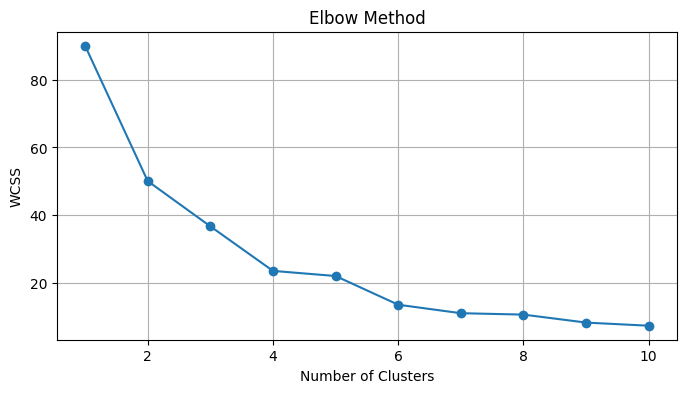

In [13]:
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import silhouette_score


for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score for {i} clusters: {score:.4f}")


Silhouette Score for 2 clusters: 0.3782
Silhouette Score for 3 clusters: 0.3073
Silhouette Score for 4 clusters: 0.3794
Silhouette Score for 5 clusters: 0.2700
Silhouette Score for 6 clusters: 0.3895
Silhouette Score for 7 clusters: 0.3786
Silhouette Score for 8 clusters: 0.3320
Silhouette Score for 9 clusters: 0.3730
Silhouette Score for 10 clusters: 0.3573


In [15]:
# Let's assume the elbow method suggested 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


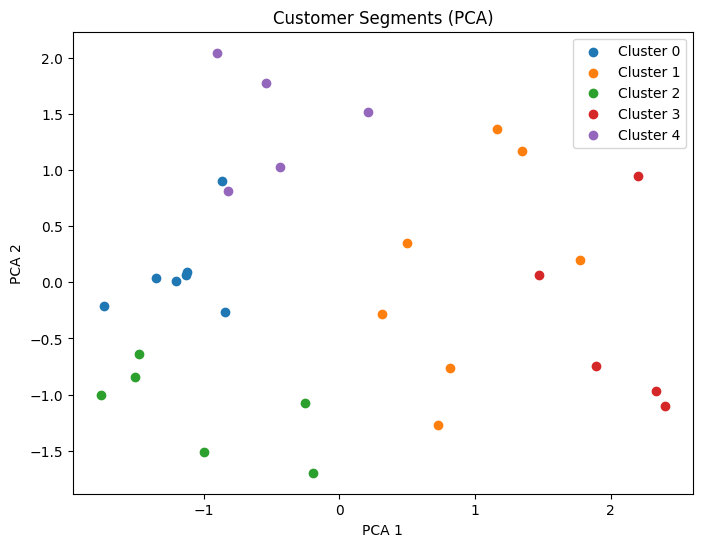

In [16]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plotting
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(
        reduced_data[df['Cluster'] == cluster, 0],
        reduced_data[df['Cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


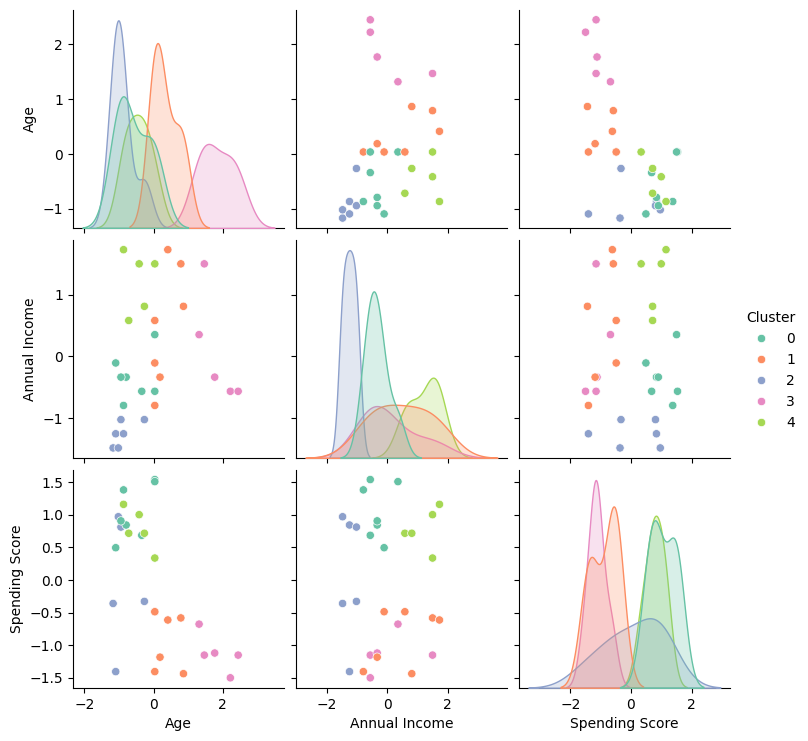

In [17]:
import seaborn as sns

# Add cluster labels to scaled_df for pairplot
scaled_df['Cluster'] = df['Cluster']
sns.pairplot(scaled_df, hue='Cluster', palette='Set2')
plt.show()


In [18]:
centroids = kmeans.cluster_centers_

# Convert back to original scale
original_centroids = scaler.inverse_transform(centroids)

# Create a DataFrame of centroids
centroid_df = pd.DataFrame(original_centroids, columns=data.columns)
print("\nCentroids of Clusters:\n", centroid_df)



Centroids of Clusters:
          Age  Annual Income  Spending Score
0  27.000000      20.000000       83.571429
1  39.000000      23.571429       22.428571
2  22.666667      16.000000       53.166667
3  59.000000      21.800000       15.000000
4  28.600000      26.800000       75.200000
